<a href="https://colab.research.google.com/github/joony0512/Deep_Learning_Class/blob/main/Part7/P7_Ch02_CH04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인물사진에서 성별과 표정분석하기

## 2. 전처리

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34

In [2]:
celeba_small = np.load('/content/drive/MyDrive/딥러닝_정주행/P7_Ch02.인물사진성별표정분석/celeba_small.npz')

train_images = celeba_small['train_images']
train_labels = celeba_small['train_labels']

test_images = celeba_small['test_images']
test_labels = celeba_small['test_labels']

In [3]:
print(train_images.shape, test_images.shape)
print(train_images.dtype, test_images.dtype)

print(train_labels.shape, test_labels.shape)
print(train_labels.dtype, test_labels.dtype)

(2000, 72, 59, 3) (200, 72, 59, 3)
float64 float64
(2000, 2) (200, 2)
int8 int8


### label one-hot encoding
- (배치, 남자여부, 웃음여부) -> (배치, 여자, 남자, 안웃음, 웃음)

In [4]:
print(train_images.min(), train_images.max())
print(train_labels.min(), train_labels.max())
print(train_labels.shape, test_labels.shape)

0.0 1.0
0 1
(2000, 2) (200, 2)


In [5]:
from keras.utils import to_categorical
train_male_labels , train_smile_labels = np.split(train_labels, 2, axis =1)
test_male_labels , test_smile_labels = np.split(test_labels, 2, axis =1)

print(train_male_labels.shape ,train_smile_labels.shape)
print(train_male_labels[0] ,train_smile_labels[0], train_labels[0])

(2000, 1) (2000, 1)
[0] [0] [0 0]


In [6]:
train_male_labels = to_categorical(train_male_labels)
train_smile_labels = to_categorical(train_smile_labels)
test_male_labels = to_categorical(test_male_labels)
test_smile_labels = to_categorical(test_smile_labels)


In [7]:
print(train_male_labels.shape, train_smile_labels.shape)
print(test_male_labels.shape, test_smile_labels.shape)


(2000, 2) (2000, 2)
(200, 2) (200, 2)


In [8]:
# (batch, male, smile) -> (batch, female, male, not smile, smile)

train_labels2 = np.concatenate([train_male_labels, train_smile_labels], axis =1)
test_labels2 = np.concatenate([test_male_labels, test_smile_labels], axis =1)

In [9]:
train_labels2.shape, test_labels2.shape

((2000, 4), (200, 4))

In [10]:
train_images[:5].shape

(5, 72, 59, 3)

## 3.시각화

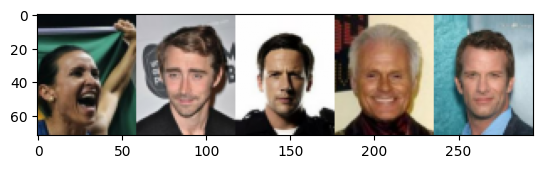

[[1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 0. 1.]]


In [11]:
plt.imshow(np.hstack(train_images[:5]))
plt.show()
print(train_labels2[:5])

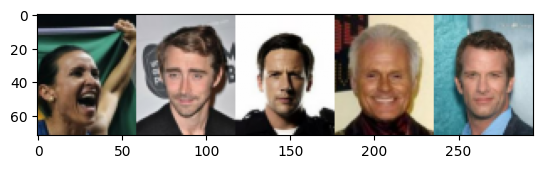

[[1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 0. 1.]]


In [12]:
plt.imshow(train_images[:5].transpose(1,0,2,3).reshape(72, -1, 3))
plt.show()
print(train_labels2[:5])

<Axes: xlabel='gender'>

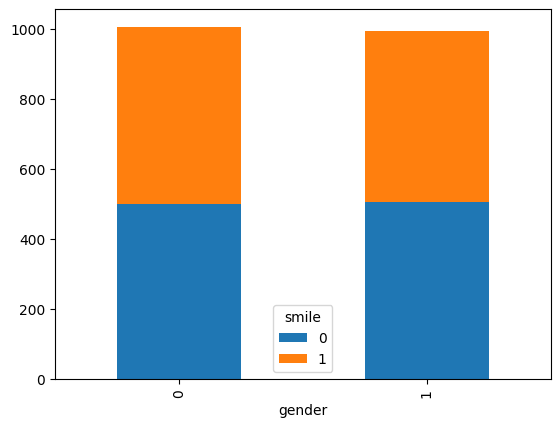

In [13]:
df = pd.DataFrame(train_labels, columns =['gender', 'smile'])
df.groupby(['gender', 'smile']).size().unstack().plot(kind='bar', stacked =True)

## 4. smile, gender 분류 각각 모델링

In [14]:
# input : (batch, 72, 59, 3)
# output : (batch, 2) ;one-hot encoding

from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, Dense, Input, Flatten

def simple_model():
    inputs = Input((72, 59, 3))

    x = Conv2D(32, 3, activation = 'relu')(inputs)
    x = MaxPool2D(2)(x)
    x = Conv2D(64, 3, activation = 'relu')(x)
    x = MaxPool2D(2)(x)
    x = Conv2D(64, 3, activation = 'relu')(x)
    x = MaxPool2D(2)(x)
    x = Flatten()(x)
    x = Dense(64, activation = 'relu')(x)
    outputs = Dense(2, activation = 'softmax')(x)
    model = Model(inputs, outputs)
    return model



In [15]:
gender_model = simple_model()
smile_model = simple_model()

In [16]:
gender_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 72, 59, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 70, 57, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 35, 28, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 33, 26, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 11, 64)        36928 

In [17]:
smile_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 72, 59, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 70, 57, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 35, 28, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 33, 26, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 11, 64)        3692

In [18]:
gender_model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)
smile_model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [19]:
gender_hist = gender_model.fit(train_images, train_male_labels, validation_data=(test_images, test_male_labels), epochs = 15, verbose =1)

Epoch 1/15
63/63 [==============================] - 16s 19ms/step - loss: 0.5865 - accuracy: 0.6805 - val_loss: 0.5459 - val_accuracy: 0.7150
Epoch 2/15
63/63 [==============================] - 0s 7ms/step - loss: 0.4561 - accuracy: 0.7805 - val_loss: 0.5816 - val_accuracy: 0.7800
Epoch 3/15
63/63 [==============================] - 0s 7ms/step - loss: 0.3581 - accuracy: 0.8435 - val_loss: 0.3552 - val_accuracy: 0.8650
Epoch 4/15
63/63 [==============================] - 0s 7ms/step - loss: 0.2418 - accuracy: 0.9040 - val_loss: 0.2785 - val_accuracy: 0.8950
Epoch 5/15
63/63 [==============================] - 0s 7ms/step - loss: 0.1877 - accuracy: 0.9230 - val_loss: 0.2601 - val_accuracy: 0.9300
Epoch 6/15
63/63 [==============================] - 0s 7ms/step - loss: 0.1471 - accuracy: 0.9475 - val_loss: 0.2146 - val_accuracy: 0.9250
Epoch 7/15
63/63 [==============================] - 0s 8ms/step - loss: 0.1087 - accuracy: 0.9665 - val_loss: 0.2410 - val_accuracy: 0.9350
Epoch 8/15
63/63 [

In [20]:
smile_hist = smile_model.fit(train_images, train_smile_labels, validation_data=(test_images, test_smile_labels), epochs = 15, verbose =1)

Epoch 1/15
63/63 [==============================] - 3s 14ms/step - loss: 0.6917 - accuracy: 0.5480 - val_loss: 0.6529 - val_accuracy: 0.6750
Epoch 2/15
63/63 [==============================] - 1s 9ms/step - loss: 0.6639 - accuracy: 0.6000 - val_loss: 0.6352 - val_accuracy: 0.6500
Epoch 3/15
63/63 [==============================] - 1s 9ms/step - loss: 0.5607 - accuracy: 0.7180 - val_loss: 0.5087 - val_accuracy: 0.7100
Epoch 4/15
63/63 [==============================] - 1s 9ms/step - loss: 0.4131 - accuracy: 0.8140 - val_loss: 0.3933 - val_accuracy: 0.8050
Epoch 5/15
63/63 [==============================] - 1s 9ms/step - loss: 0.3324 - accuracy: 0.8550 - val_loss: 0.3092 - val_accuracy: 0.8750
Epoch 6/15
63/63 [==============================] - 1s 13ms/step - loss: 0.2919 - accuracy: 0.8795 - val_loss: 0.2616 - val_accuracy: 0.9000
Epoch 7/15
63/63 [==============================] - 1s 13ms/step - loss: 0.2666 - accuracy: 0.8875 - val_loss: 0.2466 - val_accuracy: 0.9100
Epoch 8/15
63/63 

In [21]:
gender_model.get_weights()[0][0][0][0]

array([ 0.18949701, -0.07657915, -0.01860482,  0.15905459, -0.04483525,
        0.12967628,  0.09087922,  0.1234281 ,  0.01234483, -0.11842947,
       -0.0573335 , -0.13627239, -0.11233979,  0.04007955, -0.13333027,
        0.06952175, -0.02585448,  0.00272656, -0.13728938,  0.01137392,
        0.06987599,  0.02863362, -0.05077789, -0.09464291, -0.18374737,
        0.04106497,  0.13535888,  0.03898508,  0.02790121, -0.03084473,
       -0.10054666, -0.10240325], dtype=float32)

In [22]:
smile_model.get_weights()[0][0][0][0]

array([-0.11457124,  0.13504453,  0.08870133, -0.03980218, -0.00355418,
        0.06513686, -0.0242076 ,  0.00398373, -0.04509251,  0.03437077,
        0.1205008 , -0.01337549, -0.11363008, -0.04517986,  0.09323423,
       -0.15077986,  0.08594459, -0.04175412,  0.03296298,  0.14495298,
        0.03839955, -0.07421082, -0.07023272,  0.12191767,  0.06098584,
        0.02547071,  0.11812682,  0.15695184, -0.15919779, -0.13108791,
       -0.08107027,  0.17790602], dtype=float32)

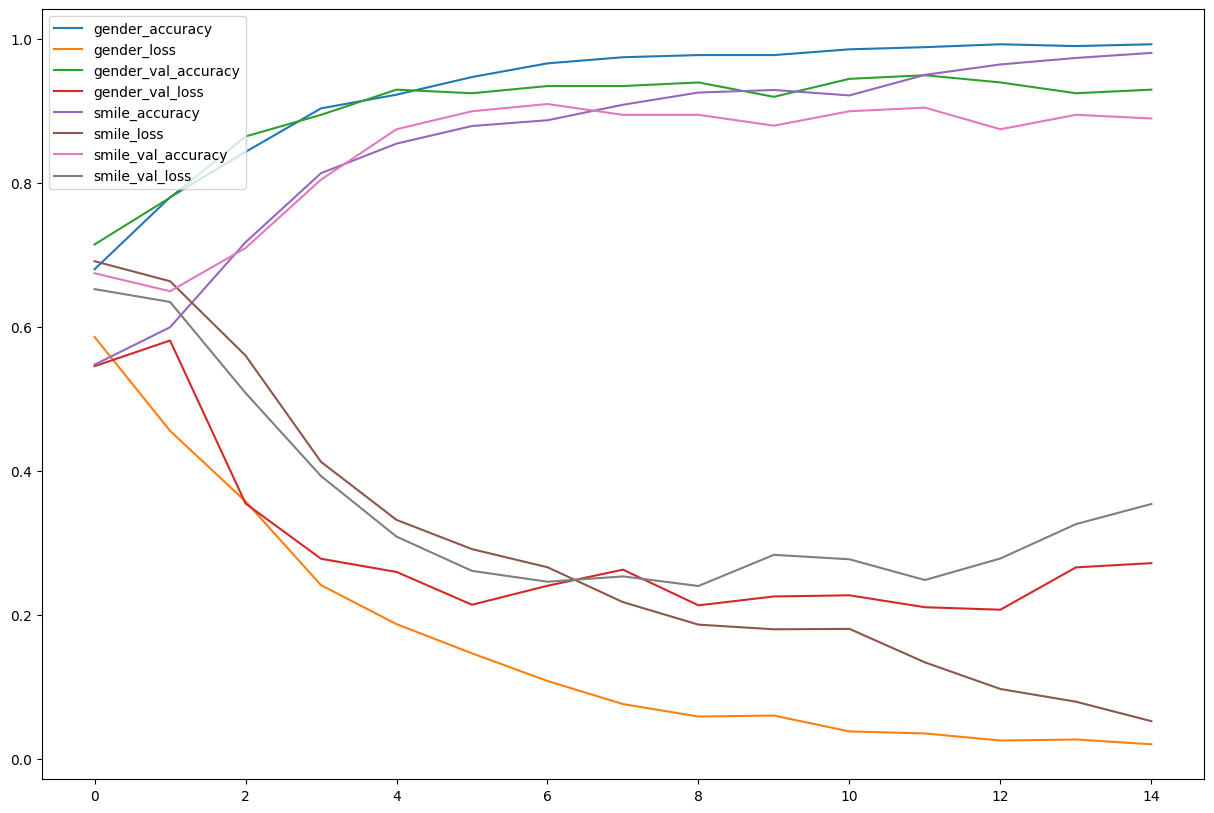

In [23]:
plt.figure(figsize = (15,10))
plt.plot(gender_hist.history['accuracy'], label = 'gender_accuracy')
plt.plot(gender_hist.history['loss'], label = 'gender_loss')
plt.plot(gender_hist.history['val_accuracy'], label = 'gender_val_accuracy')
plt.plot(gender_hist.history['val_loss'], label = 'gender_val_loss')


plt.plot(smile_hist.history['accuracy'], label = 'smile_accuracy')
plt.plot(smile_hist.history['loss'], label = 'smile_loss')
plt.plot(smile_hist.history['val_accuracy'], label = 'smile_val_accuracy')
plt.plot(smile_hist.history['val_loss'], label = 'smile_val_loss')

plt.legend(loc ='upper left')
plt.show()